# Analisis preliminar del conjunto de datos

In [406]:
#Importaciones
import pandas as pd
import numpy as np

#Para llamar a archivos de otras carpetas
import sys
sys.path.append('..')

#importar la función reduce para pode rusarla
from functools import reduce

#Visualizar todas las columnas
pd.set_option('display.max_columns', None)


In [407]:
#Después importamos el archivo de funciones ('sp_limpieza.py') 
import src.sp_limpieza as sp
#Importamos importlib para poder recargar el módulo y reflejar los cambios actualizados
import importlib  
importlib.reload(sp) 

<module 'src.sp_limpieza' from 'c:\\Users\\pooo_\\Desktop\\Hackio\\proyecto_final_troncal\\analisis_eda_proyecto_final\\jupyters\\..\\src\\sp_limpieza.py'>

In [408]:
#Para interactuar con el sistema operativo
import os
#Devuelve la ruta del directorio actual
print(os.getcwd())

c:\Users\pooo_\Desktop\Hackio\proyecto_final_troncal\analisis_eda_proyecto_final\jupyters


In [409]:
#Librerías visualización de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Transformación y limpieza de datos

### 1.1. Importación de los datos

In [410]:
#Leer los archivos
df_attendance = pd.read_csv("../data/data_raw/attendance.csv", index_col = 0)
df_homework = pd.read_csv("../data/data_raw/homework.csv", index_col = 0)
df_performance = pd.read_csv("../data/data_raw/performance.csv", index_col = 0)
df_students = pd.read_csv("../data/data_raw/students.csv", index_col = 0)
df_communication = pd.read_csv("../data/data_raw/communication.csv", index_col = 0)

### 1.2. Limpieza y transformación de los datos


In [411]:
#Ver dataframe 'df_attendace'
df_att_preliminar =  sp.eda_preliminar(df_attendance)

,Date,Subject,Attendance_Status
Student_ID,,,
S05630,2024-11-01,History,left early
S11292,2024-11-23,History,Absent
S04926,2024-11-16,History,Present
S04845,2024-12-16,Math,late
S06224,2024-08-01,English,Present


____________________________
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 364680 entries, S06592 to S12134
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date               364680 non-null  object
 1   Subject            364680 non-null  object
 2   Attendance_Status  364680 non-null  object
dtypes: object(3)
memory usage: 11.1+ MB


None

____________________________
NULOS


Date                 0.0
Subject              0.0
Attendance_Status    0.0
dtype: float64

____________________________
DUPLICADOS


np.int64(347112)

____________________________
DESCRIBE


,count,unique,top,freq
Date,364680,366,2024-12-31,1075
Subject,364680,6,Math,61241
Attendance_Status,364680,8,PRESENT,45982


____________________________
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
Date,364680,366,2024-12-31,1075
Subject,364680,6,Math,61241
Attendance_Status,364680,8,PRESENT,45982


____________________________
VALUE COUNTS
Date
2024-12-31    1075
2024-05-05    1073
2024-09-06    1070
2024-08-06    1068
2024-09-22    1068
              ... 
2024-12-25     922
2024-05-09     921
2024-03-31     919
2024-12-07     917
2024-04-21     905
Name: count, Length: 366, dtype: int64
Subject
Math         61241
Science      60881
Arabic       60749
English      60684
Geography    60640
History      60485
Name: count, dtype: int64
Attendance_Status
PRESENT       45982
Absent        45751
Present       45632
Late          45509
 late         45508
absnt         45478
left early    45435
excused       45385
Name: count, dtype: int64
____________________________


In [412]:
#Quitar los espacios y pasar a misnuculas las tabla
df_attendance = sp.valores_a_minus(df_attendance)
df_attendance.sample(10)

,date,subject,attendance_status
student_id,,,
s00017,2024-11-03,math,present
s03910,2024-08-23,science,present
s08871,2024-10-10,math,present
s12057,2024-09-19,geography,absent
s06316,2024-10-29,english,absent
s02994,2025-01-05,math,late
s05020,2024-11-04,history,excused
s04144,2024-08-21,science,absent
s10206,2024-09-15,math,absent


In [413]:
#Ver en la columna attendance_status que valores tiene.
conteo = df_attendance['attendance_status'].value_counts()
conteo

attendance_status
present       91614
late          91017
absent        45751
absnt         45478
left early    45435
excused       45385
Name: count, dtype: int64

In [414]:
#Corregimos el valor 'absnt' por 'absent' y comprobamos los resultados de la columna
df_attendance['attendance_status'] = df_attendance['attendance_status'].replace('absnt','absent')

conteo = df_attendance['attendance_status'].value_counts()
conteo
#Ya tenemos los valores de esta columna corregidos.

attendance_status
present       91614
absent        91229
late          91017
left early    45435
excused       45385
Name: count, dtype: int64

In [415]:
#Cambiar nombre de columna 'date' para hacerla mas descriptiva y 'attendace_status' para hacerla mas corta.
df_attendance.rename(columns={'date':'att_date', 'attendance_status':'att_status'}, inplace= True)

In [416]:
# Como la columna 'date' es de tipo 'Object' vamos a pasarla a tipo Datetime y comprobamos el tipo de dato que sea correct
df_attendance = sp.convertir_columna_a_fecha(df_attendance, 'att_date')
df_attendance.sample(10)

Columna 'att_date' convertida a datetime con formato %Y-%m-%d.


,att_date,subject,att_status
student_id,,,
s04096,2024-10-16,science,present
s10186,2024-10-05,history,present
s03791,2024-06-11,math,left early
s05524,2024-05-09,history,absent
s03322,2024-08-08,english,absent
s03527,2024-10-20,math,present
s10163,2024-10-29,geography,late
s03944,2024-07-29,math,excused
s00899,2024-09-02,geography,present


In [417]:
#Comprobación del tipo de dato de la columna
print(df_attendance['att_date'].dtype)

datetime64[ns]


In [418]:
#Comprobamos el resto de columnas que sean de tipo correcto.
print(df_attendance.dtypes)

att_date      datetime64[ns]
subject               object
att_status            object
dtype: object


In [419]:
#Ver dataframe 'df_homework'
df_hw_preliminar =  sp.eda_preliminar(df_homework)
df_hw_preliminar

,Subject,Assignment_Name,Due_Date,Status,Grade_Feedback,Guardian_Signature
Student_ID,,,,,,
S10869,Geography,Weight claim.,2024-09-15,Done,D,Yes
S09797,English,Reduce leader.,2024-12-16,Done,A,Yes
S04166,Science,Assume.,2025-02-03,✔,C-,
S08521,Geography,Me position.,2024-10-24,❌,A+,No
S00771,Science,Election window.,01/24/2025,not done,C,Yes


____________________________
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 60780 entries, S12002 to S08589
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Subject             60780 non-null  object
 1   Assignment_Name     60780 non-null  object
 2   Due_Date            60780 non-null  object
 3   Status              60780 non-null  object
 4   Grade_Feedback      60780 non-null  object
 5   Guardian_Signature  60780 non-null  object
dtypes: object(6)
memory usage: 3.2+ MB


None

____________________________
NULOS


Subject               0.0
Assignment_Name       0.0
Due_Date              0.0
Status                0.0
Grade_Feedback        0.0
Guardian_Signature    0.0
dtype: float64

____________________________
DUPLICADOS


np.int64(0)

____________________________
DESCRIBE


,count,unique,top,freq
Subject,60780,6,English,10209
Assignment_Name,60780,56065,Also.,15
Due_Date,60780,366,2025-01-23,315
Status,60780,6,Done,10278
Grade_Feedback,60780,8,A+,7709
Guardian_Signature,60780,3,No,20372


____________________________
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
Subject,60780,6,English,10209
Assignment_Name,60780,56065,Also.,15
Due_Date,60780,366,2025-01-23,315
Status,60780,6,Done,10278
Grade_Feedback,60780,8,A+,7709
Guardian_Signature,60780,3,No,20372


____________________________
VALUE COUNTS
Subject
English      10209
Geography    10179
Science      10112
History      10110
Arabic       10106
Math         10064
Name: count, dtype: int64
Assignment_Name
Also.                      15
Term.                      15
Understand.                13
Not.                       13
Eye.                       12
                           ..
Effect job amount.          1
Study indicate fight.       1
Reach whose investment.     1
Suggest figure.             1
Involve determine.          1
Name: count, Length: 56065, dtype: int64
Due_Date
2025-01-23    315
2025-03-02    302
2024-11-06    301
2024-11-08    300
2024-12-25    299
             ... 
11/04/2024     52
10/13/2024     51
12/21/2024     50
11/22/2024     50
03/01/2025     46
Name: count, Length: 366, dtype: int64
Status
 Done       10278
not done    10234
❌           10151
✔           10090
pending     10014
✅           10013
Name: count, dtype: int64
Grade_Feedback
A+    7709
B-    7639

In [420]:
#Pasar dataframe a minusculas
df_homework = sp.valores_a_minus(df_homework)
df_homework.sample(10)

,subject,assignment_name,due_date,status,grade_feedback,guardian_signature
student_id,,,,,,
s05699,geography,difference old across.,02/24/2025,✔,d,no
s05823,geography,language between.,2024-10-27,✔,c,
s06760,arabic,federal.,02/20/2025,✅,b-,yes
s02857,geography,threat open.,2025-03-08,not done,b-,no
s02665,geography,born customer.,2024-11-20,✔,d,
s02172,history,back amount foreign head.,2024-10-15,pending,d,no
s01547,english,firm hope.,2024-10-27,✔,a+,
s07577,english,enough true generation.,2025-02-19,❌,b,yes
s05489,geography,skill interest stuff.,2024-11-24,✅,b,no


In [421]:
#La columna 'due_date' tiene valores de fecha con diferentes formatos.
# Hay que pasarlo a un formato y asignalo como de tipo datetime.

df_homework = sp.convertir_columna_a_fecha(df_homework, 'due_date')
df_homework.sample(10)

Columna 'due_date' convertida a datetime con formato %Y-%m-%d.


,subject,assignment_name,due_date,status,grade_feedback,guardian_signature
student_id,,,,,,
s03897,math,produce road.,NaT,❌,f,
s09938,english,idea especially.,2024-12-15,done,f,
s10038,english,range thank every.,2024-12-16,not done,b,no
s05946,math,stuff point should end.,2024-09-14,✅,a,
s06974,arabic,gun dark work.,2024-09-20,❌,c,no
s02546,history,continue resource.,2025-02-04,done,a+,no
s04160,english,mother as democrat.,2024-09-13,not done,b-,no
s02611,english,effect leave soldier.,NaT,not done,d,no
s08614,arabic,this thought coach.,2024-12-31,not done,a+,


In [422]:
#Comprobación del tipo de dato de la columna
print(df_homework['due_date'].dtype)

datetime64[ns]


In [423]:
#Sacar nulos de la columna 'due_date' mediante funcion de sp.limpieza.py
nulos = sp.nulos_num_porcentaje(df_homework)
print(nulos)

(subject                   0
assignment_name           0
due_date              12358
status                    0
grade_feedback            0
guardian_signature        0
dtype: int64, subject                0.00
assignment_name        0.00
due_date              20.33
status                 0.00
grade_feedback         0.00
guardian_signature     0.00
dtype: float64)


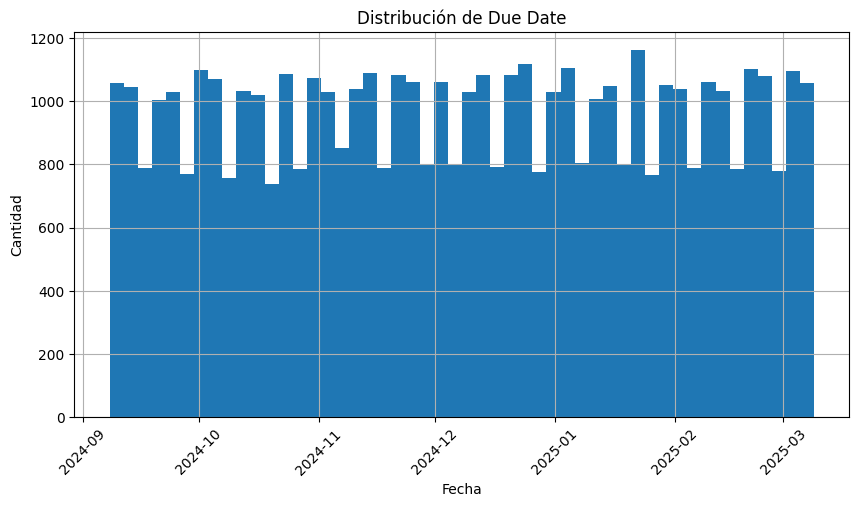

In [424]:
#🔴🔴 VALORAR SI ESTO MERECE O ME QUEDO SOLO CON LA CELDA DE ABAJO, QUE PONE --> describe().
# La columna 'due_date' tiene una cantidad elevada de nulos (20.33%) por lo que antes de imputarla comprobamos
#como es la distribución de sus valores para poder así valorar si imputar los nulos, si por media, moda o mediana.

df_homework['due_date'].hist(bins=50, figsize=(10,5))
plt.title('Distribución de Due Date')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()


In [425]:
print(df_homework['due_date'].describe())

count                            48422
mean     2024-12-08 09:02:43.710710016
min                2024-09-08 00:00:00
25%                2024-10-24 00:00:00
50%                2024-12-09 00:00:00
75%                2025-01-23 00:00:00
max                2025-03-09 00:00:00
Name: due_date, dtype: object


In [426]:
#Dado que las fechas están bastante centradas en torno a finales de 2024, lo más razonable sería:
# Imputar con la mediana (50%), que es 2024-12-09, ya que la mediana es robusta frente a outliers y nos va a evitar 
# en caso de haber un par de fechas raras que el resultado no se distorsione demasiado.

mediana_fecha = df_homework['due_date'].median()
df_homework['due_date'].fillna(mediana_fecha, inplace= True)


C:\Users\pooo_\AppData\Local\Temp\ipykernel_16004\3655258861.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_homework['due_date'].fillna(mediana_fecha, inplace= True)


In [427]:
#Comprobamos que los nulos han desaparecido
nulos = sp.nulos_num_porcentaje(df_homework)
print(nulos)

(subject               0
assignment_name       0
due_date              0
status                0
grade_feedback        0
guardian_signature    0
dtype: int64, subject               0.0
assignment_name       0.0
due_date              0.0
status                0.0
grade_feedback        0.0
guardian_signature    0.0
dtype: float64)


In [428]:
#Para coregir la columna 'status' vamos a comprobar primero el tipo de valores que tiene.
status_valores = df_homework['status'].value_counts()
status_valores

status
done        10278
not done    10234
❌           10151
✔           10090
pending     10014
✅           10013
Name: count, dtype: int64

In [429]:
#Vamos a homogeinizar esos valores. 
mapeo_status = {
    '✅':'done',
    '❌':'not done',
    '✔':'done',
    'pending':'pending',
    'done':'done',
    'not done':'not done',
}

df_homework['status'] = df_homework['status'].replace(mapeo_status)

status_valores = df_homework['status'].value_counts()
status_valores


status
done        30381
not done    20385
pending     10014
Name: count, dtype: int64

In [430]:
#Debemos comprobar la columna 'guardian_signatura' ya que tiene campos vacíos que pandas
# lo detecta como cadena de texto vacía.
valores = df_homework['guardian_signature'].value_counts()
print(valores)

guardian_signature
no     20372
yes    20348
       20060
Name: count, dtype: int64


In [431]:
#Debemos de convertir la cadena vacia por nulos de numpy. Después vamos a comprobar cuantos nulos son.
df_homework['guardian_signature'] = df_homework['guardian_signature'].replace('', np.nan)
ver_nulos= sp.nulos_num_porcentaje(df_homework['guardian_signature'])
ver_nulos

(np.int64(20060), np.float64(33.0))

In [432]:
#Comprobamos la distribución (en porcentaje) de los 3 valores de la columna.
print(df_homework['guardian_signature'].value_counts(dropna=False, normalize=True)*100)

guardian_signature
no     33.517604
yes    33.478118
NaN    33.004278
Name: proportion, dtype: float64


In [433]:
#Hay un 33% de nulos de la columna 'guardian_signature' por tanto vamos a ver sus cuartiles, media etc.
print(df_homework['guardian_signature'].describe())

count     40720
unique        2
top          no
freq      20372
Name: guardian_signature, dtype: object


In [434]:
#Vamos a imputar los nulos con 'unknown' ya que así no modificamos artificialmente la proporción original y
# dejamos constancia de que falta esta información.

df_homework['guardian_signature'].fillna('unknown', inplace = True)

#Comprobamos la distribución (en porcentaje) de los 3 valores de la columna.
print(df_homework['guardian_signature'].value_counts())

guardian_signature
no         20372
yes        20348
unknown    20060
Name: count, dtype: int64


C:\Users\pooo_\AppData\Local\Temp\ipykernel_16004\2920811997.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_homework['guardian_signature'].fillna('unknown', inplace = True)


In [435]:
df_homework.sample(10)

,subject,assignment_name,due_date,status,grade_feedback,guardian_signature
student_id,,,,,,
s02378,math,break address environmental.,2024-09-13,done,c-,no
s01692,history,appear travel.,2024-12-09,not done,c-,no
s10473,history,measure popular.,2025-02-28,not done,b-,no
s07168,history,compare wall number.,2024-10-05,done,f,yes
s10389,history,pass camera station.,2024-10-01,done,f,yes
s03466,english,hard i newspaper.,2025-01-28,done,b,unknown
s07305,english,partner road simple.,2024-10-18,done,b,no
s00276,english,scene.,2024-12-09,done,c-,no
s04792,arabic,trip south husband.,2024-10-29,done,a,no


In [436]:
#Ver dataframe 'df_communication'
df_comm_preliminar =  sp.eda_preliminar(df_communication)
df_comm_preliminar

,Date,Message_Type,Message_Content
Student_ID,,,
S07010,2025-02-23,Parent to Teacher,Visit work doctor worry size can collection wh...
S09522,2025-02-17,Automated Reminder,Society know analysis parent knowledge partici...
S09440,2024-11-17,Teacher to Parent,
S01750,2025-02-06,Automated Reminder,Remain cause treat significant entire developm...
S01618,2024-10-01,Teacher to Parent,Early six than maintain long two to word mothe...


____________________________
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 24312 entries, S01133 to S03501
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             24312 non-null  object
 1   Message_Type     24312 non-null  object
 2   Message_Content  24312 non-null  object
dtypes: object(3)
memory usage: 759.8+ KB


None

____________________________
NULOS


Date               0.0
Message_Type       0.0
Message_Content    0.0
dtype: float64

____________________________
DUPLICADOS


np.int64(737)

____________________________
DESCRIBE


,count,unique,top,freq
Date,24312,183,2025-02-18,164
Message_Type,24312,3,Teacher to Parent,8149
Message_Content,24312,23086,,1227


____________________________
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
Date,24312,183,2025-02-18,164
Message_Type,24312,3,Teacher to Parent,8149
Message_Content,24312,23086,,1227


____________________________
VALUE COUNTS
Date
2025-02-18    164
2024-12-27    163
2025-03-02    163
2024-10-24    157
2024-10-06    156
             ... 
2024-09-20    110
2024-12-03    108
2024-10-10    108
2025-02-22    107
2024-11-21    103
Name: count, Length: 183, dtype: int64
Message_Type
Teacher to Parent     8149
Automated Reminder    8106
Parent to Teacher     8057
Name: count, dtype: int64
Message_Content
                                                                                                                                                            1227
Than far indeed gun doctor concern hear whose policy people board traditional.                                                                                 1
Than time unit nearly wrong man blue probably yes season civil car later both from those.                                                                      1
Around positive side your city top common pretty again agent.                                    

In [437]:
df_communication = sp.valores_a_minus(df_communication)
df_communication.sample(10)

,date,message_type,message_content
student_id,,,
s01526,2025-02-22,parent to teacher,myself international carry party century colle...
s05801,2025-03-02,automated reminder,grow could benefit vote guy budget leader if v...
s08690,2025-02-14,automated reminder,talk avoid able far indicate result himself na...
s07891,2025-01-06,teacher to parent,worker show design nearly bank show light comm...
s10990,2024-11-19,automated reminder,help card step group pretty million job add pr...
s10192,2025-02-17,automated reminder,check past method those painting involve see a...
s07645,2025-02-23,teacher to parent,course difficult phone list law republican sea...
s06587,2025-01-10,teacher to parent,beyond between issue current hit trip five cle...
s06599,2024-10-19,automated reminder,


In [438]:
#Cambiar el nombre de date a uno mas descriptivo y convertirlo a tipo datetime
df_communication.rename(columns={'date':'date_message'}, inplace=True)

df_communication = sp.convertir_columna_a_fecha(df_communication, 'date_message')
df_communication.sample(10)

Columna 'date_message' convertida a datetime con formato %Y-%m-%d.


,date_message,message_type,message_content
student_id,,,
s10165,2025-02-13,automated reminder,
s10775,2024-10-11,parent to teacher,week participant eye trip push hotel want alth...
s05759,2024-09-08,teacher to parent,
s00148,2024-10-07,teacher to parent,however attorney accept yet become industry kn...
s04517,2025-01-06,automated reminder,someone thank three wind they enough you daugh...
s08620,2024-09-11,parent to teacher,course capital mean degree order really preven...
s03337,2024-11-27,parent to teacher,hair together successful yourself determine fi...
s09166,2025-02-28,parent to teacher,indicate wrong listen tell rest but player hea...
s01727,2024-10-24,automated reminder,child avoid better require social hear technol...


In [439]:
#Comprobación del tipo de dato de la columna
print(df_communication['date_message'].dtype)

datetime64[ns]


In [440]:
#Comprobar los valores que hay en la columna 'date_message'
print(df_communication['message_type'].value_counts())

message_type
teacher to parent     8149
automated reminder    8106
parent to teacher     8057
Name: count, dtype: int64


In [441]:
#Viendo la columna 'message_content' a través de la funcion eda_preliminar parece que hay campos vacíos (cadenas de texto vacías)
# que no figuran como nulos.

df_communication['message_content'] = df_communication['message_content'].replace('', np.nan)
ver_nulos= sp.nulos_num_porcentaje(df_communication['message_content'])
ver_nulos

(np.int64(1227), np.float64(5.05))

In [442]:
#Eliminamos los nulos de 'message_content' ya que son escasos y buscamos tener el  dataframe lo más limpio posible.
df_communication = df_communication.dropna(subset=['message_content'])

In [443]:
df_prfm_preliminar = sp.eda_preliminar(df_performance)
df_prfm_preliminar

,Subject,Exam_Score,Homework_Completion_%,Teacher_Comments
Student_ID,,,,
S08205,Arabic,94,100%,Miss mind serve begin bar shoulder Congress ar...
S07649,Science,95,95,Above wonder him why eye certain return.
S04741,English,110,-5,Them never in plant impact until might develop...
S06122,English,63,100%,News firm company action pressure can indicate.
S10845,History,92,-5,Beyond determine second too war skin school ma...


____________________________
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 36468 entries, S00396 to S09604
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Subject                36468 non-null  object
 1   Exam_Score             36468 non-null  int64 
 2   Homework_Completion_%  36468 non-null  object
 3   Teacher_Comments       36468 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


None

____________________________
NULOS


Subject                  0.0
Exam_Score               0.0
Homework_Completion_%    0.0
Teacher_Comments         0.0
dtype: float64

____________________________
DUPLICADOS


np.int64(1858)

____________________________
DESCRIBE


,count,mean,std,min,25%,50%,75%,max
Exam_Score,36468.0,74.964243,20.538704,40.0,57.0,75.0,93.0,110.0


____________________________
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
Subject,36468,6,Arabic,6224
Homework_Completion_%,36468,5,95,7453
Teacher_Comments,36468,32918,,3551


____________________________
VALUE COUNTS
Subject
Arabic       6224
Science      6093
Geography    6082
English      6043
Math         6035
History      5991
Name: count, dtype: int64
Homework_Completion_%
95      7453
-5      7376
100%    7296
80%     7283
90      7060
Name: count, dtype: int64
Teacher_Comments
                                                                             3551
Including describe event yet middle assume rest any pick whatever oil.          1
Set factor safe fine fast population including.                                 1
Between current hotel west recognize believe hand on poor ball wonder.          1
Probably specific science memory her stand since main.                          1
                                                                             ... 
Environmental newspaper close story space season detail.                        1
Music tend or occur know development see.                                       1
Car the choice college consume

In [444]:
df_performance = sp.valores_a_minus(df_performance)
df_performance.sample(10)

,subject,exam_score,homework_completion_%,teacher_comments
student_id,,,,
s06917,geography,100,-5,quality affect event enter start agency.
s04446,math,79,95,sound court because consumer although table wh...
s10150,science,47,-5,strong gas start unit street game hour trouble.
s07379,geography,86,95,determine around might scene production they h...
s04844,arabic,87,80%,congress minute age class chair kind nation.
s00570,geography,104,100%,again than capital idea data could great.
s02150,history,57,90,write range enjoy little artist trouble.
s10461,science,46,95,perform south list type walk describe human em...
s04741,arabic,90,95,everything blue attention book cut trip hospital.


In [445]:
#Sabiendo que las notas deben ser entre 0-100, aquellas inferiores a 0 y superiores a 100 van a ser outliers, tenemos que identificarlos 
#y saber cuantos son en porcentaje. 

#Filas de la columna
total_filas = df_performance.shape[0]

#Outliers inferioes
outliers_inf = df_performance[df_performance['exam_score'] < 0]
outliers_inf_num = outliers_inf.shape[0]
outiersl_inf_porcentaje = round(outliers_inf_num / total_filas * 100, 2)

#Outliers superiores
outliers_sup = df_performance[df_performance['exam_score'] > 100]
outliers_sup_num = outliers_sup.shape[0]
outliers_sup_porcentaje = round(outliers_sup_num / total_filas * 100, 2)

#Mostramos los resultados
print(f"Outliers inferiores (<0):{outliers_inf_num}, que corresponden al {outiersl_inf_porcentaje} de los datos")
print(f"Outliers superiores (>100):{outliers_sup_num}, que corresponden al {outliers_sup_porcentaje} de los datos")


Outliers inferiores (<0):0, que corresponden al 0.0 de los datos
Outliers superiores (>100):5139, que corresponden al 14.09 de los datos


In [446]:
#Dado que las notas deben oscilar entre 0 y 100 como mínimo y máximo esos outliers que representan un 14.09% de los datos,
#no vamos a eliminarlos ya que en este análisis vamos a tener en cuenta el rendimiento en los exámenes. Por eso, los outliers vamos
#a reescalarlos al máximo permitido, asumiendo que han sido errores del dataset original. 

df_performance.loc[df_performance['exam_score'] > 100, 'exam_score'] = 100

In [447]:
#Comprobamos que ya no hay outliers
print(f"Outliers superiores (>100):{outliers_sup_num}, que corresponden al {outliers_sup_porcentaje} de los datos")


Outliers superiores (>100):5139, que corresponden al 14.09 de los datos


In [448]:
def limpiar_homework_completion(x):
    """
    Limpia y convierte los valores de 'homework_completion_%' a números. Elimina el '%' de las cadenas y convierte a `float`. 
    Los valores negativos se convierten en 0 y los mayores a 100 se ajustan a 100.

    Parámetros:
    x (str, int, float): Valor a limpiar y convertir.

    Devuelve:
    float: Valor entre 0 y 100, o None si hay un error.
    """
    try:
        if isinstance(x, str) and '%' in x:
            x = float(x.replace('%', '').strip())
        elif isinstance(x, str):
            x = float(x.strip())
        elif isinstance(x, (int, float)):
            x = float(x)
        else:
            return None
        
        if x < 0:
            x = 0
        elif x > 100:
            x = 100
        return x
    except:
        return None

# Verificamos primero existencia de la columna antes de limpiar
if 'homework_completion_%' in df_performance.columns:
    # Limpiamos la columna 'homework_completion_%' directamente 
    df_performance['homework_completion_%'] = df_performance['homework_completion_%'].apply(limpiar_homework_completion)
    # Convertimos los valores a formato porcentaje
    df_performance['homework_completion_%'] = df_performance['homework_completion_%'].apply(lambda x: f"{round(x)}%" if x is not None else None)
    print("Columna 'homework_completion_%' limpiada correctamente.")
else:
    print("La columna 'homework_completion_%' no existe en df_performance.")


Columna 'homework_completion_%' limpiada correctamente.


In [449]:
#Comprobamos que los valores de la columna 'homework_completion_%' sean consistentes
df_performance.sample(10)

,subject,exam_score,homework_completion_%,teacher_comments
student_id,,,,
s05638,arabic,69,90%,lead even some spring contain matter country e...
s05676,science,71,0%,kind benefit off make station true effect sea.
s05429,geography,77,90%,city possible mind pull small week not peace e...
s08884,history,62,80%,later third we know theory tax but rule hair g...
s04680,arabic,76,80%,
s00310,arabic,90,90%,camera republican stop could production whose ...
s05840,english,67,90%,art field support agency south among artist si...
s08330,geography,100,100%,life knowledge reveal product above father sou...
s09976,math,86,90%,each decide add rise health better history int...


In [450]:
#Los campos vacíos de la columna 'teacher_comments' pasarlos a nulos para saber cuantos hay.np
df_performance['teacher_comments'] = df_performance['teacher_comments'].replace('', np.nan)

# Contar valores nulos en la columna 'teacher_comments'
nulos = sp.nulos_num_porcentaje(df_performance['teacher_comments'])
nulos

(np.int64(3551), np.float64(9.74))

In [451]:
#Imputar las filas que tienen nulos (un 9.74%) ya que no queremos
# perder el resto de información de esas filas.

df_performance['teacher_comments'] = df_performance['teacher_comments'].fillna('No comment')

df_performance.sample(10)

,subject,exam_score,homework_completion_%,teacher_comments
student_id,,,,
s01495,history,43,80%,white congress generation want section stand t...
s08684,history,60,90%,director support sure community huge learn term.
s08124,geography,57,95%,plan strategy work kid effort available.
s07188,geography,75,100%,better side enter run mission truth.
s03400,science,85,95%,population picture imagine particularly those ...
s01616,geography,84,90%,ability successful number five my rich differe...
s03594,arabic,87,90%,No comment
s04025,english,95,0%,level buy newspaper range middle sea dream pow...
s06253,arabic,67,100%,camera kid seem control so pass play partner t...


In [452]:
df_std_preliminar = sp.eda_preliminar(df_students)
df_std_preliminar

,Full_Name,Date_of_Birth,Grade_Level,Emergency_Contact
Student_ID,,,,
S07965,sara rivera,2016-05-22,Grade 4,001-230-302-0258x52286
S10511,Jessica Bell,2008-10-19,Grade 4,+1-782-933-6025x8553
S02449,Vincent Meyer,2010-11-03,Grade 2,(960)696-6884x7061
S02175,Brandon Hernandez,2011-03-25,Grade 4,326.635.8118x3186
S04364,Jason Mays,2008-09-03,Grade 1,490-272-0383


____________________________
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 12156 entries, S00001 to S12156
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Full_Name          12156 non-null  object
 1   Date_of_Birth      12156 non-null  object
 2   Grade_Level        12156 non-null  object
 3   Emergency_Contact  11538 non-null  object
dtypes: object(4)
memory usage: 474.8+ KB


None

____________________________
NULOS


Full_Name            0.00
Date_of_Birth        0.00
Grade_Level          0.00
Emergency_Contact    5.08
dtype: float64

____________________________
DUPLICADOS


np.int64(0)

____________________________
DESCRIBE


,count,unique,top,freq
Full_Name,12156,11442,Michael Smith,6
Date_of_Birth,12156,5350,2013-11-29,10
Grade_Level,12156,5,Grade 5,2472
Emergency_Contact,11538,11538,3793041001,1


____________________________
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
Full_Name,12156,11442,Michael Smith,6
Date_of_Birth,12156,5350,2013-11-29,10
Grade_Level,12156,5,Grade 5,2472
Emergency_Contact,11538,11538,3793041001,1


____________________________
VALUE COUNTS
Full_Name
Michael Smith     6
Michael Lewis     5
Michelle Smith    5
Angela Harris     5
James Smith       4
                 ..
Beth Stephens     1
Ryan Robinson     1
Juan Mccoy        1
Denise Patton     1
Keith Wood        1
Name: count, Length: 11442, dtype: int64
Date_of_Birth
2013-11-29    10
2011-06-10     9
2017-04-17     9
2011-06-04     9
2006-03-11     8
              ..
2008-09-21     1
2018-01-10     1
2010-11-12     1
2010-08-30     1
2015-07-29     1
Name: count, Length: 5350, dtype: int64
Grade_Level
Grade 5    2472
Grade 4    2454
Grade 3    2447
Grade 2    2400
Grade 1    2383
Name: count, dtype: int64
Emergency_Contact
3793041001              1
781-534-4258x9046       1
(635)437-6131           1
(270)269-1173x5503      1
625.766.1101            1
                       ..
706.708.0421x412        1
+1-933-864-5644x501     1
+1-794-484-8495x7772    1
306-771-1524x116        1
308.517.3750            1
Name: count, Length: 115

In [453]:
df_students = sp.valores_a_minus(df_students)
df_students.sample(10)

,full_name,date_of_birth,grade_level,emergency_contact
student_id,,,,
s05274,katie marshall,2015-05-25,grade 1,(381)424-8754x53115
s03993,ryan hardy,2015-04-08,grade 4,(669)651-5177
s01265,kenneth kemp,2018-09-14,grade 5,829-257-1046
s11204,mrs. susan garza dds,2013-01-23,grade 2,001-349-842-6685x22307
s09120,regina miller,2008-08-14,grade 4,+1-464-449-3263
s03518,christopher good,2010-10-12,grade 4,692-987-5830
s08889,crystal brown,2012-10-27,grade 3,993.245.5371x12513
s07585,kimberly moore,2009-10-04,grade 2,(968)277-0766x15066
s04174,james thomas,2008-10-04,grade 2,(325)546-9385


In [454]:
#Pasar la columna date_of_birth al formato correcto
df_students = sp.convertir_columna_a_fecha(df_students,'date_of_birth')
df_students.sample(10)

Columna 'date_of_birth' convertida a datetime con formato %Y-%m-%d.


,full_name,date_of_birth,grade_level,emergency_contact
student_id,,,,
s05841,nathan christian,2009-06-17,grade 1,734-512-6540x371
s06051,larry gross,NaT,grade 1,(341)660-2073
s10157,jenna chen,2018-02-08,grade 5,(587)884-9760x5442
s10806,ashley green,2010-01-13,grade 5,+1-324-331-7920x612
s05150,daniel nelson,2009-06-13,grade 1,+1-386-728-6309
s06193,olivia livingston,2008-06-02,grade 2,917.864.6873
s10411,leslie arroyo,2010-07-25,grade 5,6659861289
s02647,andrea bradley,2016-07-13,grade 4,2262960620
s09537,mary davis,2008-07-15,grade 1,(594)634-9352x4021


In [455]:
#Comprobar los valores nulos de 'date_of_birth'
nulos = sp.nulos_num_porcentaje(df_students['date_of_birth'])
nulos

(np.int64(1205), np.float64(9.91))

In [456]:
#Eliminar los nulos de 'date_of_birth' de los estudiantes porque no es un dato relevante este dato demográfico para el analisis.
#Estamos analizando las notas, asistencias y productividad de los estudiantes.
df_students = df_students.dropna(subset=['date_of_birth'])

In [457]:
#Pasar la columna 'grade' a numerica. 

df_students['grade_level'] = df_students['grade_level'].str.extract('(\d+)').astype(int)
df_students.sample(5)

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\pooo_\AppData\Local\Temp\ipykernel_16004\1318979116.py:3: SyntaxWarning: invalid escape sequence '\d'
  df_students['grade_level'] = df_students['grade_level'].str.extract('(\d+)').astype(int)


,full_name,date_of_birth,grade_level,emergency_contact
student_id,,,,
s11890,travis blake,2012-01-14,4,487.607.6650x746
s09043,mr. david avila,2012-08-19,4,674-727-6586x81964
s02847,brittany nolan,2016-11-06,5,001-245-782-8373x39420
s06397,timothy brooks,2017-10-26,2,+1-403-426-1923
s10809,misty gallagher,2016-04-23,3,NaN


In [458]:
#Contar los nulos de emergency_contact y valor que hacer con ellos.
nulos_emergency_contact =sp.nulos_num_porcentaje(df_students['emergency_contact'])
nulos_emergency_contact

(np.int64(558), np.float64(5.1))

In [459]:
#Eliminamos estos nulos porque no son relevantes y queremos filas lo más completaas posibles.
df_students = df_students.dropna(subset=['emergency_contact'])

# 2. Análisis descriptivo de los datos

### 2.1. Resumen estadístico 

In [476]:
#Ver estadísticas df_attendance
att_stats = sp.obtener_estadisticas(df_attendance)
att_stats

Estadísticas Numéricas                                 \
                             count                           mean   
att_date                    364680  2024-09-07 11:13:51.352418560   
att_numeric               364680.0                       0.625387   
subject                        NaN                            NaN   
att_status                     NaN                            NaN   

                                                                            \
                             min                  25%                  50%   
att_date     2024-03-09 00:00:00  2024-06-08 00:00:00  2024-09-07 00:00:00   
att_numeric                  0.0                  0.0                  1.0   
subject                      NaN                  NaN                  NaN   
att_status                   NaN                  NaN                  NaN   

                                                                 \
                             75%                  max       std   
att_date     2024-12-08 00:00:00  2025-03-09 00:00:00       NaN   
att_numeric                  1.0                  1.0  0.484024   
subject                      NaN                  NaN       NaN   
att_status                   NaN                  NaN       NaN   

            Estadísticas Categóricas                         
                               count unique      top   freq  
att_date                         NaN    NaN      NaN    NaN  
att_numeric                      NaN    NaN      NaN    NaN  
subject                       364680      6     math  61241  
att_status                    364680      5  present  91614

In [477]:
#Ver estadísticas df_homework
hmw_stats = sp.obtener_estadisticas(df_homework)
hmw_stats

Estadísticas Numéricas                                 \
                                    count                           mean   
due_date                            60780  2024-12-08 12:05:09.891411968   
subject                               NaN                            NaN   
assignment_name                       NaN                            NaN   
status                                NaN                            NaN   
grade_feedback                        NaN                            NaN   
guardian_signature                    NaN                            NaN   

                                                              \
                                    min                  25%   
due_date            2024-09-08 00:00:00  2024-11-05 00:00:00   
subject                             NaN                  NaN   
assignment_name                     NaN                  NaN   
status                              NaN                  NaN   
grade_feedback                      NaN                  NaN   
guardian_signature                  NaN                  NaN   

                                                              \
                                    50%                  75%   
due_date            2024-12-09 00:00:00  2025-01-11 00:00:00   
subject                             NaN                  NaN   
assignment_name                     NaN                  NaN   
status                              NaN                  NaN   
grade_feedback                      NaN                  NaN   
guardian_signature                  NaN                  NaN   

                                        Estadísticas Categóricas         \
                                    max                    count unique   
due_date            2025-03-09 00:00:00                      NaN    NaN   
subject                             NaN                    60780      6   
assignment_name                     NaN                    60780  56065   
status                              NaN                    60780      3   
grade_feedback                      NaN                    60780      8   
guardian_signature                  NaN                    60780      3   

                                    
                        top   freq  
due_date                NaN    NaN  
subject             english  10209  
assignment_name       also.     15  
status                 done  30381  
grade_feedback           a+   7709  
guardian_signature       no  20372

In [478]:
perf_stats = sp.obtener_estadisticas(df_performance)
perf_stats

Estadísticas Numéricas                                  \
                                       count       mean      std   min   25%   
exam_score                           36468.0  74.189454  19.4164  40.0  57.0   
subject                                  NaN        NaN      NaN   NaN   NaN   
homework_completion_%                    NaN        NaN      NaN   NaN   NaN   
teacher_comments                         NaN        NaN      NaN   NaN   NaN   

                                         Estadísticas Categóricas         \
                        50%   75%    max                    count unique   
exam_score             75.0  93.0  100.0                      NaN    NaN   
subject                 NaN   NaN    NaN                    36468      6   
homework_completion_%   NaN   NaN    NaN                    36468      5   
teacher_comments        NaN   NaN    NaN                    36468  32918   

                                         
                              top  freq  
exam_score                    NaN   NaN  
subject                    arabic  6224  
homework_completion_%         95%  7453  
teacher_comments       No comment  3551

In [ ]:
#Ver estadísticas df_communication 
comm_stats = sp.obtener_estadisticas(df_communication)
comm_stats

,count,unique,top,freq
message_type,23085,3,teacher to parent,7754
message_content,23085,23085,baby price expert certain forget ball bar prod...,1


In [479]:
#Ver estadísticas df_students
std_stats = sp.obtener_estadisticas(df_students)
std_stats

Estadísticas Numéricas                                 \
                                   count                           mean   
date_of_birth                      10393  2012-08-23 23:14:41.554892544   
grade_level                      10393.0                       3.019821   
full_name                            NaN                            NaN   
emergency_contact                    NaN                            NaN   

                                                             \
                                   min                  25%   
date_of_birth      2006-03-11 00:00:00  2009-06-08 00:00:00   
grade_level                        1.0                  2.0   
full_name                          NaN                  NaN   
emergency_contact                  NaN                  NaN   

                                                             \
                                   50%                  75%   
date_of_birth      2012-08-25 00:00:00  2015-11-15 00:00:00   
grade_level                        3.0                  4.0   
full_name                          NaN                  NaN   
emergency_contact                  NaN                  NaN   

                                                 Estadísticas Categóricas  \
                                   max       std                    count   
date_of_birth      2019-03-09 00:00:00       NaN                      NaN   
grade_level                        5.0  1.410736                      NaN   
full_name                          NaN       NaN                    10393   
emergency_contact                  NaN       NaN                    10393   

                                              
                  unique            top freq  
date_of_birth        NaN            NaN  NaN  
grade_level          NaN            NaN  NaN  
full_name           9757  michael smith    6  
emergency_contact  10393     3793041001    1

# 3. Visualización de los datos.

In [ ]:
#🟡🟡DATOS DE ASISTENCIA.
#Ver cual es el promedio de asistencia por grado y ver si hay relación entre la asistencia y el rendimiento de los estudiantes.

# Crear una columna numérica para mapear el estado de asistencia
df_attendance['att_numeric'] = df_attendance['att_status'].map({
    'present': 1,
    'late': 1,
    'left early': 1,
    'absent': 0,
    'excused': 0
})

In [ ]:
#Cuantas ausencias hubo en cada día
# Filtrar solo los registros con 'absent' o 'excused'
df_absent = df_attendance[df_attendance['att_status'].isin(['absent', 'excused'])]

# Agrupar por 'att_date' y contar las ausencias
absences_by_date = df_absent.groupby('att_date').size().reset_index(name='absence_count')

# Ordenar de mayor a menor para ver los días con más ausencias
absences_by_date = absences_by_date.sort_values(by='absence_count', ascending=False)

# Visualizar los días con más ausencias
plt.figure(figsize=(10,6))
sns.lineplot(data=absences_by_date, x='att_date', y='absence_count', marker='o', color='red')
plt.title('Días con más Ausencias')
plt.xlabel('Fecha')
plt.ylabel('Número de Ausencias')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Calcular el porcentaje de cada tipo de asistencia, si asistieron o no a clase.
attendance_counts = round(df_attendance['att_numeric'].value_counts(normalize=True) * 100,2)

# Mostrar los resultados
print(attendance_counts)


In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_attendance, x='att_status', palette='viridis')
plt.title('Distribución de Estados de Asistencia')
plt.xlabel('Estado de Asistencia')
plt.ylabel('Cantidad de Registros')
plt.show()


In [ ]:
# Barplot de asistencia por grado
plt.figure(figsize=(8,5))
sns.barplot(data= df_attendance, x='grade_level', y='att_numeric', palette='viridis')
plt.title('Tasa promedio de Asistencia por Grado')
plt.xlabel('Nivel de Grado')
plt.ylabel('Tasa de Asistencia')
plt.ylim(0,1)
plt.show()

# O si prefieres lineplot, para la asistencia por fecha
plt.figure(figsize=(10,6))
sns.lineplot(data=absences_by_date, x='att_date', y='absence_count', marker='o', color='red')
plt.title('Días con más Ausencias')
plt.xlabel('Fecha')
plt.ylabel('Número de Ausencias')
plt.xticks(rotation=45)
plt.show()


### 3.1. Histogramas para la distribución de variables numéricas

### 3.2. Boxplots para detectar outliers

### 3.3. Gráficos de barras para variables categóricas

### 3.4. Heatmap de correlaciones

# 4. Guardar archivos limpios